# **Write Shakespeare Sonnets with NLP**

---


For this project, I’ll take a corpus of Shakespeare sonnets, and use them to train a model. Then, see if that model can create poetry!

**File Description**

sonnets.txt : Text file containing all of William Shakespeare's sonnets where each sonnet is separated by a two newline characters.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku 
import numpy as np 


tokenizer = Tokenizer()
data = open('/content/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 10s 626us/sample - loss: 6.8054 - accuracy: 0.0230
Epoch 2/100
15462/15462 [==============================] - 6s 387us/sample - loss: 6.4351 - accuracy: 0.0323
Epoch 3/100
15462/15462 [==============================] - 6s 391us/sample - loss: 6.2302 - accuracy: 0.0349
Epoch 4/100
15462/15462 [==============================] - 6s 382us/sample - loss: 6.0194 - accuracy: 0.0428
Epoch 5/100
15462/15462 [==============================] - 6s 378us/sample - loss: 5.7722 - accuracy: 0.0509
Epoch 6/100
15462/15462 [==============================] - 6s 381us/sample - loss: 5.5030 - accuracy: 0.0647
Epoch 7/100
15462/15462 [==============================] - 6s 386us/sample - loss: 5.2367 - accuracy: 0.0753
Epoch 8/100
15462/15462 [==============================] - 6s 377us/sample - loss: 4.9581 - accuracy: 0.0901
Epoch 9/100
15462/15462 [==============================] - 6s 376us/sample - loss: 4.6667 - accuracy: 0.

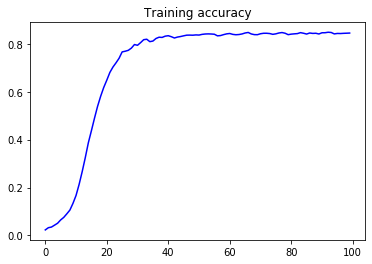

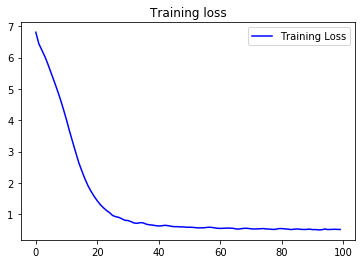

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [7]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope what deceived strong love be strong might place thee all be dead still so rare free be old near perceived now me old date alone new young to tell men ' forth men ' forth his fair verse can hate all more ' alone light still now green one live date to thee alone need in thee this not abuse me ' him dead ' alone are seen a tomb me light date alone young to store truth truth lust in sun decrease hours lust in sun number'd hours lust in sun number'd hours lust in sun and trust hours
